In [4]:
import numpy as np
import cv2
import keras
import tensorflow
import os
import matplotlib.pyplot as plt
import pandas as pd
import random

In [5]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5247856633978380116, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15703436274372266231
 physical_device_desc: "device: XLA_CPU device"]

In [3]:
gpu_options = tensorflow.GPUOptions(per_process_gpu_memory_fraction=0.7)
sess = tensorflow.Session(config=tensorflow.ConfigProto(gpu_options=gpu_options))

In [4]:
#sess.run(increase())

In [5]:
#sess.close()

In [2]:
from keras.callbacks import TensorBoard
tensorboard = TensorBoard()

In [2]:
CATEGORIES = ["not-crocodile", "crocodile"]
IMG_SIZE = 80

In [3]:
# Load numpy data with data = np.load('train_data.npy')
# Load pandas data with labels = pd.read_csv('train_labels.csv')

def create_training_data():
    training_data = []
    for category in CATEGORIES:
        path = category
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                blured = cv2.GaussianBlur(new_array,(5,5),0)
                training_data.append([blured, class_num])
            except Exception as e:
                print(e) 
    return training_data


In [122]:
training_data = create_training_data()

In [123]:
len(training_data)

762

In [124]:
#cv2.imshow('image', training_data[0][0])

In [125]:
random.shuffle(training_data)

In [126]:
for sample in training_data[:10]:
    print(sample[1])

0
1
1
1
1
1
1
0
0
1


In [127]:
import numpy as np
import os
import cv2

def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
                for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
                for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy

In [14]:
for data, label in training_data:
    data = noisy("gauss", [data, 1])

AttributeError: 'list' object has no attribute 'shape'

In [128]:
trainX = []
trainY = []

for features, label in training_data:
    trainX.append(features)
    trainY.append(label)

trainX = np.array(trainX).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [129]:
i=0
while i < 100:
    num = random.randint(0, len(training_data)-1)
    if trainY[num] == 1:
        multiplier = random.uniform(0.3, 0.9)
        trainX[i] = trainX[i] * multiplier
        print ("Number: " + str(num) + " Multiplier: " + str(multiplier))
        i+=1

Number: 565 Multiplier: 0.6569421353332796
Number: 480 Multiplier: 0.8163315795268531
Number: 244 Multiplier: 0.5939743255622933
Number: 158 Multiplier: 0.4506185971474018
Number: 660 Multiplier: 0.4750329091769947
Number: 674 Multiplier: 0.4760774784232606
Number: 136 Multiplier: 0.4973951981561146
Number: 192 Multiplier: 0.5932000031297282
Number: 142 Multiplier: 0.49628138781812287
Number: 277 Multiplier: 0.8716863700806923
Number: 655 Multiplier: 0.6461845270757312
Number: 136 Multiplier: 0.7567024423834245
Number: 711 Multiplier: 0.405793562704902
Number: 159 Multiplier: 0.725729662677437
Number: 79 Multiplier: 0.655082630184068
Number: 133 Multiplier: 0.3669138004340871
Number: 286 Multiplier: 0.47083030615375177
Number: 379 Multiplier: 0.5505819954311169
Number: 261 Multiplier: 0.3321378733530475
Number: 89 Multiplier: 0.8531803160937286
Number: 349 Multiplier: 0.8100412053647552
Number: 478 Multiplier: 0.33404443258245314
Number: 638 Multiplier: 0.4805283149279298
Number: 331 M

In [130]:
trainY

[0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,


In [131]:
trainX = trainX/255.0
trainX

array([[[[0.4745098 ],
         [0.45098039],
         [0.37254902],
         ...,
         [0.1254902 ],
         [0.14117647],
         [0.14901961]],

        [[0.4745098 ],
         [0.45490196],
         [0.38823529],
         ...,
         [0.1254902 ],
         [0.14117647],
         [0.14901961]],

        [[0.47058824],
         [0.4627451 ],
         [0.43137255],
         ...,
         [0.12941176],
         [0.13333333],
         [0.1372549 ]],

        ...,

        [[0.17254902],
         [0.18431373],
         [0.20392157],
         ...,
         [0.42352941],
         [0.43529412],
         [0.43921569]],

        [[0.16470588],
         [0.17647059],
         [0.19607843],
         ...,
         [0.41960784],
         [0.42352941],
         [0.42745098]],

        [[0.16078431],
         [0.17254902],
         [0.19607843],
         ...,
         [0.41960784],
         [0.41960784],
         [0.42352941]]],


       [[[0.62745098],
         [0.62745098],
         [0.61

In [132]:
np.save('train_data.npy', trainX, allow_pickle=True, fix_imports=True)
trainY = pd.Series(trainY, index=range(762))
trainY.to_csv('train_labels.csv', ["Labels"])

In [6]:
trainX = np.load('train_data.npy')
trainY = pd.read_csv('train_labels.csv', names=["Labels"])

In [7]:
trainX.shape

(762, 80, 80, 1)

In [10]:
#trainY = trainY.drop(["0"], axis=1)
#trainY.shape
#len(trainY)
trainY.shape

(762, 1)

In [11]:
# from keras.utils import np_utils
# trainY = np_utils.to_categorical(trainY)

In [14]:
from keras.layers import Conv2D, Activation, Dropout, Dense, LeakyReLU, Flatten, MaxPooling2D, AveragePooling2D
from keras.models import Sequential
def conv_model():
    model = Sequential()


    #model.add(Conv2D(64, (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 3), data_format='channels_last'))
    model.add(Conv2D(32, (3,3), input_shape = trainX.shape[1:]))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(2,2))

#     model.add(Conv2D(32, (3,3)))
#     model.add(Activation("relu"))
#     model.add(MaxPooling2D(2,2))
    
#     model.add(Conv2D(64, (3,3)))
#     model.add(Activation("relu"))
    
#     model.add(Conv2D(64, (3,3)))
#     model.add(Activation("relu"))
    
#     model.add(Conv2D(64, (3,3), data_format='channels_last'))
#     model.add(Activation("sigmoid"))
    
#     model.add(Conv2D(10, (3,3), data_format='channels_last'))
#     model.add(LeakyReLU(alpha=0.3))
    
#     model.add(Conv2D(10, (3,3), data_format='channels_last'))
#     model.add(Activation("sigmoid"))

    model.add(Flatten())
    #model.add(Dropout(0.2))
    model.add(Dense(64))
    model.add(Activation("relu"))
    #model.add(LeakyReLU(alpha=0.3))
    
    
#     model.add(Dense(20))
#     model.add(Activation("sigmoid"))
    
#     model.add(Dense(20))
#     model.add(Activation("sigmoid"))
    
#     model.add(Dense(20))
#     model.add(LeakyReLU(alpha=0.3))
    

    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss="binary_crossentropy",
                optimizer = "Adadelta",#Adadelta",
                metrics = ["accuracy"])
    return model
    

In [15]:
model = conv_model()

Train on 685 samples, validate on 77 samples
Epoch 1/8
685/685 [==============================] - 8s 12ms/step - loss: 0.7756 - acc: 0.5051 - val_loss: 0.6932 - val_acc: 0.4805
Epoch 2/8
685/685 [==============================] - 7s 10ms/step - loss: 0.6929 - acc: 0.5343 - val_loss: 0.6934 - val_acc: 0.4805
Epoch 3/8
685/685 [==============================] - 7s 10ms/step - loss: 0.6868 - acc: 0.5620 - val_loss: 0.6890 - val_acc: 0.5325
Epoch 4/8
685/685 [==============================] - 7s 10ms/step - loss: 0.6532 - acc: 0.6920 - val_loss: 0.5629 - val_acc: 0.7143
Epoch 5/8
685/685 [==============================] - 7s 10ms/step - loss: 0.5728 - acc: 0.6978 - val_loss: 0.5552 - val_acc: 0.7662
Epoch 6/8
685/685 [==============================] - 7s 10ms/step - loss: 0.5194 - acc: 0.7504 - val_loss: 0.5334 - val_acc: 0.7143
Epoch 7/8
685/685 [==============================] - 7s 10ms/step - loss: 0.4834 - acc: 0.7737 - val_loss: 0.5437 - val_acc: 0.7013
Epoch 8/8
685/685 [============

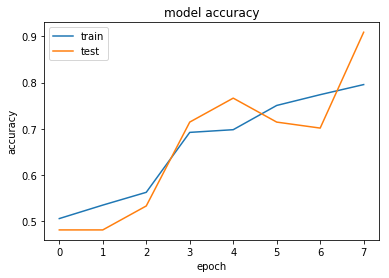

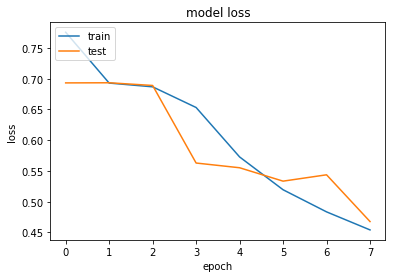

In [17]:
history = model.fit(trainX,
         trainY,
         validation_split=0.1,
         batch_size=10,
         epochs=8)
         #callbacks=[tensorboard])


print(history.history.keys())


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# def conv_model():
#     conv = Sequential()


#     conv.add(Conv2D(8, (10,10), input_shape = (IMG_SIZE, IMG_SIZE, 3), data_format='channels_last'))
#     conv.add(Activation("sigmoid"))
#     conv.add(MaxPooling2D(2,2))
    
#     conv.add(Conv2D(20, (5,5), data_format='channels_first'))
#     conv.add(Activation("relu"))
#     conv.add(MaxPooling2D(2,2))
    
#     conv.add(Conv2D(30, (3,3), data_format='channels_first'))
#     conv.add(Activation("relu"))
#     conv.add(MaxPooling2D(2,2))
    
#     conv.add(Conv2D(50, (3,2), data_format='channels_first'))
#     conv.add(Activation("relu"))
#     conv.add(MaxPooling2D(2,2))



#     conv.add(Flatten())
#     conv.add(Dropout(0.2))
#     conv.add(Dense(36))
#     conv.add(LeakyReLU(alpha=0.3))
    
#     conv.add(Dense(50))
#     conv.add(Activation("relu"))
    

#     conv.add(Dense(2))
#     conv.add(Activation("softmax"))

#     conv.compile(loss="binary_crossentropy", #categorical_crossentropy
#                 optimizer = "adam",
#                 metrics = ["accuracy"])
#     return conv

In [18]:
model.save('convNN.model')

In [14]:
model = keras.models.load_model('convNN.model')

In [19]:
i=1
while i <= 12:
    img_array = cv2.imread("not/not" + str(i) + ".jpg", cv2.IMREAD_GRAYSCALE)
    try:
        image = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        blur = cv2.GaussianBlur(image,(5,5),0)
        ready_to_predict = np.array(blur).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
        ready_to_predict = ready_to_predict/255
        print(str(i) + ' - ' + str(model.predict(ready_to_predict)))
    except Exception as e:
        print(e)
    i = i + 1

1 - [[0.50798464]]
2 - [[0.35286587]]
3 - [[0.5359837]]
4 - [[0.44578514]]
5 - [[0.51524496]]
6 - [[0.4775835]]
7 - [[0.5151624]]
8 - [[0.5589231]]
9 - [[0.5036547]]
10 - [[0.528485]]
11 - [[0.3937888]]
12 - [[0.5083691]]


In [29]:
ready_to_predict = np.array(trainX[304]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(ready_to_predict)
print(predictions)

[[0.85195285]]


In [37]:
print(predictions[0:20]>0.5)

NameError: name 'predictions' is not defined